Training...
0.774855555556
Training...
0.775388888889
Training...
0.776222222222
Training...
0.778066666667
Training...
0.776588888889
Training...
0.777566666667
Training...
0.776033333333
Training...
0.775333333333
Training...
0.776933333333
Training...
0.775288888889


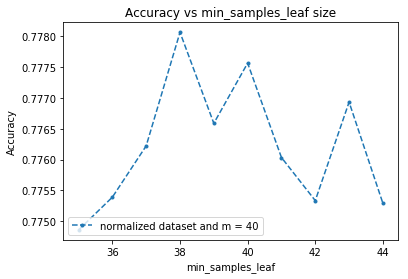

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

from numpy import genfromtxt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA

# Read train file
un_trainX = genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = genfromtxt("trainLabel.csv", delimiter=',')

# Read validation file
un_testX = genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = genfromtxt("validationLabel.csv", delimiter=',')

# Read test file
testsample = genfromtxt("test.csv", delimiter=',')

# Select features
selection = SelectKBest(k=100).fit(n_trainX, trainLabel)
n_trainX_new = selection.transform(n_trainX)
n_testX_new = selection.transform(n_testX)


# Bagging and Random Forests
accuracy = []
min_samples_leaf = []
for i in range(10):
    print("Training...")
    min_samples_leaf.append(i + 35)
    # train normalized dataset
    clf = RandomForestClassifier(n_estimators = 80, min_samples_leaf = i + 1, random_state = 0)
    clf.fit(n_trainX_new, trainLabel)
    
    # compute accuracy
    result = clf.score(n_testX_new, testLabel)
    print(result)
    accuracy.append(result)
    
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs min_samples_leaf size')

plt.plot(min_samples_leaf, accuracy, '--.', label = 'normalized dataset and m = 40')
plt.legend(loc='lower left')
plt.show()


In [6]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA

# Read train file
un_trainX = numpy.genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabel.csv", delimiter=',')

# Read validation file
un_testX = numpy.genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')

# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

# Select features
selection = SelectKBest(k=100).fit(n_trainX, trainLabel)
n_trainX_new = selection.transform(n_trainX)
n_testX_new = selection.transform(n_testX)
n_testdata_new = selection.transform(n_testdata)

# Bagging and Random Forests
print("Training...")
# train normalized dataset
clf = RandomForestClassifier(n_estimators = 80, min_samples_leaf = 4, random_state = 0)
clf.fit(n_trainX_new, trainLabel)

# compute accuracy
result = clf.score(n_testX_new, testLabel)
print('Validation accuraacy = ', result)

print('Predicting...')
result = clf.predict(n_testdata_new)

print('Write result to disk')
numpy.savetxt('result.csv', result, delimiter=',', fmt='%d')    
print('Complete')


Training...
validation accuraacy =  0.778066666667
Predicting...
write result to disk
Complete
